# Understanding the training log

``` json
{"lr": 0.019999999999999952, "data_time": 0.012604165077209472, "loss": 1.9277699756622315, "loss_rpn_cls": 0.09244678679853678, "loss_rpn_bbox": 0.05614282118156552, "s0.loss_cls": 0.4472324872016907, "s0.acc": 79.6875, "s0.loss_bbox": 0.17585482008755207, "s0.loss_mask": 0.39298591524362564, "s1.loss_cls": 0.19879151068627834, "s1.acc": 80.6132583618164, "s1.loss_bbox": 0.13929389908909798, "s1.loss_mask": 0.18788625285029412, "s2.loss_cls": 0.08531460955739022, "s2.acc": 82.23099517822266, "s2.loss_bbox": 0.06463155245408415, "s2.loss_mask": 0.08718929514288902, "time": 0.5645133829116822, "epoch": 1, "iter": 58600, "memory": 12144, "step": 58600}

{"coco/bbox_mAP": 0.102, "coco/bbox_mAP_50": 0.179, "coco/bbox_mAP_75": 0.102, "coco/bbox_mAP_s": 0.045, "coco/bbox_mAP_m": 0.103, "coco/bbox_mAP_l": 0.145, "coco/segm_mAP": 0.094, "coco/segm_mAP_50": 0.167, "coco/segm_mAP_75": 0.093, "coco/segm_mAP_s": 0.031, "coco/segm_mAP_m": 0.092, "coco/segm_mAP_l": 0.148, "data_time": 0.0066435403823852535, "time": 0.11910636968612671, "step": 1}
```
|name|meaning|
|---|---|
|lr|learning rate|
|data_time|time taken to load and preprocess the training data|
|loss|overall loss value|
|loss_rpn_cls|classification loss for the region proposals|
|loss_rpn_bbox|bounding box regression loss RPN|
|s*.loss_cls|classification loss for each stage|
|s*.acc|accuracy achieved for the corresponding stage|
|s*.loss_bbox|losses for bounding box regression|
|s*.loss_mask|mask prediction|
|time|overall time taken for the current iteration, including both the forward and backward passes through the network and any other computations|
|epoch|iter through every image loop count|
|iter|an iteration typically refers to a single update step of the model's parameters using a batch of training data|
|memory|VRAM MB|
|step|iter|
|bbox_mAP|mean average precision (mAP) for bounding box|
|bbox_mAP_50|mAP at an IoU threshold of 0.5|
|bbox_mAP_s|mAP values for different object sizes|
|segm_mAP|mAP for instance segmentation|



# COCO

In [1]:
import os
script = "../analysis_tools/analyze_logs.py"
func = "plot_curve"
seaborn_style = "whitegrid"
log_files = \
    "./logs/coco-mae-2-384.json " + \
    "./logs/coco-mae-2-768.json " + \
    "./logs/coco-mae-6-384.json " + \
    "./logs/coco-mae-6-768.json " + \
    "./logs/coco-mae-12-384.json " + \
    "./logs/coco-mae-12-768.json " + \
    "./logs/coco-none-2-384.json " + \
    "./logs/coco-none-2-768.json " + \
    "./logs/coco-none-6-768.json "
legend = \
    "MAE-2-384 " + \
    "MAE-2-768 " + \
    "MAE-6-384 " + \
    "MAE-6-768 " + \
    "MAE-12-384 " + \
    "MAE-12-768 " + \
    "NON-2-384 " + \
    "NON-2-768 " + \
    "NON-6-768 "

key = "bbox_mAP"
out = "./analysis_out/COCO-BBox-mAP.svg"
title = "'COCO BBox mAP'"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

key = "segm_mAP"
out = "./analysis_out/COCO-Segm-mAP.svg"
title = "'COCO Segm mAP'"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

key = "loss"
out = "./analysis_out/COCO-Loss.svg"
title = "Loss"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

log_files = \
    "./logs/coco-mae-2-384.json " + \
    "./logs/coco-mae-2-768.json " + \
    "./logs/coco-mae-6-384.json " + \
    "./logs/coco-mae-6-768.json " + \
    "./logs/coco-mae-12-384.json "+ \
    "./logs/coco-mae-12-768.json "
legend = \
    "MAE-2-384 " + \
    "MAE-2-768 " + \
    "MAE-6-384 " + \
    "MAE-6-768 " + \
    "MAE-12-384 "+ \
    "MAE-12-768 "

key = "memory"
out = "./analysis_out/COCO-Memory.svg"
title = "Memory"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

key = "lr"
out = "./analysis_out/COCO-LR.svg"
title = "'Learning Rate'"
os.system("python3 " + script + " " + func + " " + "./logs/coco-mae-2-384.json " + "--keys " + key + " --legend " + "All " + "--title " + title + " --style " + seaborn_style + " --out " + out)

key = "time"
out = "./analysis_out/COCO-Time-Cost.svg"
title = "'Time Cost (sec/iter)'"
legend = \
    "MAE-2-384[2080Ti] " + \
    "MAE-2-768[2080Ti] " + \
    "MAE-6-384[V100] " + \
    "MAE-6-768[A40] " + \
    "MAE-12-384[A40] "+ \
    "MAE-12-768[A40] "
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)


plot curve of ./logs/coco-mae-2-384.json, metric is bbox_mAP
plot curve of ./logs/coco-mae-2-768.json, metric is bbox_mAP
plot curve of ./logs/coco-mae-6-384.json, metric is bbox_mAP
plot curve of ./logs/coco-mae-6-768.json, metric is bbox_mAP
plot curve of ./logs/coco-mae-12-384.json, metric is bbox_mAP
plot curve of ./logs/coco-mae-12-768.json, metric is bbox_mAP
plot curve of ./logs/coco-none-2-384.json, metric is bbox_mAP
plot curve of ./logs/coco-none-2-768.json, metric is bbox_mAP
plot curve of ./logs/coco-none-6-768.json, metric is bbox_mAP
save curve to: ./analysis_out/COCO-BBox-mAP.svg
plot curve of ./logs/coco-mae-2-384.json, metric is segm_mAP
plot curve of ./logs/coco-mae-2-768.json, metric is segm_mAP
plot curve of ./logs/coco-mae-6-384.json, metric is segm_mAP
plot curve of ./logs/coco-mae-6-768.json, metric is segm_mAP
plot curve of ./logs/coco-mae-12-384.json, metric is segm_mAP
plot curve of ./logs/coco-mae-12-768.json, metric is segm_mAP
plot curve of ./logs/coco-none

0

In [2]:
log_files = \
    "./logs/coco-mae-2-384.json " + \
    "./logs/coco-mae-2-768.json " + \
    "./logs/coco-mae-6-384.json " + \
    "./logs/coco-mae-6-768.json " + \
    "./logs/coco-mae-12-384.json " + \
    "./logs/coco-mae-12-768.json " + \
    "./logs/coco-none-2-384.json " + \
    "./logs/coco-none-2-768.json " + \
    "./logs/coco-none-6-768.json "
func = "cal_train_time"
os.system("python3 " + script + " " + func + " " + log_files)

-----Analyze train time of ./logs/coco-mae-2-384.json-----
slowest epoch 12, average time is 0.4821 s/iter
fastest epoch 1, average time is 0.4238 s/iter
time std over epochs is 0.0158
average iter time: 0.4582 s/iter

-----Analyze train time of ./logs/coco-mae-2-768.json-----
slowest epoch 12, average time is 0.5549 s/iter
fastest epoch 1, average time is 0.4556 s/iter
time std over epochs is 0.0270
average iter time: 0.5236 s/iter

-----Analyze train time of ./logs/coco-mae-6-384.json-----
slowest epoch 10, average time is 0.5439 s/iter
fastest epoch 4, average time is 0.4859 s/iter
time std over epochs is 0.0187
average iter time: 0.5055 s/iter

-----Analyze train time of ./logs/coco-mae-6-768.json-----
slowest epoch 12, average time is 0.5877 s/iter
fastest epoch 1, average time is 0.5561 s/iter
time std over epochs is 0.0078
average iter time: 0.5765 s/iter

-----Analyze train time of ./logs/coco-mae-12-384.json-----
slowest epoch 12, average time is 0.6744 s/iter
fastest epoch 1,

0

# Balloon

In [3]:
func = "plot_curve"

log_files = \
    "./logs/ball-mae-6-768-200.json "+\
    "./logs/ball-mae-6-768-200lr.json "+\
    "./logs/ball-r101-200.json "+\
    "./logs/ball-r101-200lr.json "
legend = \
    "MAE-6-768 " + \
    "MAE-6-768-lr " + \
    "R101 " + \
    "R101-lr "

key = "bbox_mAP"
out = "./analysis_out/BALL-BBox-mAP.svg"
title = "'COCO BBox mAP'"
eval_itv = "10"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out + " --eval-interval " + eval_itv)

key = "segm_mAP"
out = "./analysis_out/BALL-Segm-mAP.svg"
title = "'COCO Segm mAP'"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out + " --eval-interval " + eval_itv)

key = "loss"
out = "./analysis_out/BALL-Loss.svg"
title = "Loss"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

key = "memory"
out = "./analysis_out/BALL-Memory.svg"
title = "Memory"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

log_files = \
    "./logs/ball-mae-6-768-200.json "+\
    "./logs/ball-mae-6-768-200lr.json "
legend = \
    "200e-High " + \
    "200e-Low "
key = "lr"
out = "./analysis_out/BALL-LR.svg"
title = "'Learning Rate'"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

plot curve of ./logs/ball-mae-6-768-200.json, metric is bbox_mAP
plot curve of ./logs/ball-mae-6-768-200lr.json, metric is bbox_mAP
plot curve of ./logs/ball-r101-200.json, metric is bbox_mAP
plot curve of ./logs/ball-r101-200lr.json, metric is bbox_mAP
save curve to: ./analysis_out/BALL-BBox-mAP.svg
plot curve of ./logs/ball-mae-6-768-200.json, metric is segm_mAP
plot curve of ./logs/ball-mae-6-768-200lr.json, metric is segm_mAP
plot curve of ./logs/ball-r101-200.json, metric is segm_mAP
plot curve of ./logs/ball-r101-200lr.json, metric is segm_mAP
save curve to: ./analysis_out/BALL-Segm-mAP.svg
plot curve of ./logs/ball-mae-6-768-200.json, metric is loss
plot curve of ./logs/ball-mae-6-768-200lr.json, metric is loss
plot curve of ./logs/ball-r101-200.json, metric is loss
plot curve of ./logs/ball-r101-200lr.json, metric is loss
save curve to: ./analysis_out/BALL-Loss.svg
plot curve of ./logs/ball-mae-6-768-200.json, metric is memory
plot curve of ./logs/ball-mae-6-768-200lr.json, met

0

In [4]:
log_files = \
    "./logs/ball-mae-6-768-200.json "+\
    "./logs/ball-mae-6-768-200lr.json "+\
    "./logs/ball-r101-200.json "+\
    "./logs/ball-r101-200lr.json "+\
    "./logs/ball-mae-12-768-600lr.json "
legend = \
    "MAE-6-768 " + \
    "MAE-6-768-lr " + \
    "R101 " + \
    "R101-lr " +\
    "MAE-12-768-lr "

key = "bbox_mAP"
out = "./analysis_out/BALL-BBox-mAP-600.svg"
title = "'COCO BBox mAP'"
eval_itv = "30"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out + " --eval-interval " + eval_itv)

key = "segm_mAP"
out = "./analysis_out/BALL-Segm-mAP-600.svg"
title = "'COCO Segm mAP'"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out + " --eval-interval " + eval_itv)

key = "loss"
out = "./analysis_out/BALL-Loss-600.svg"
title = "Loss"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

key = "memory"
out = "./analysis_out/BALL-Memory-600.svg"
title = "Memory"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

log_files = \
    "./logs/ball-mae-6-768-200.json "+\
    "./logs/ball-mae-6-768-200lr.json "+\
    "./logs/ball-mae-12-768-600lr.json "
legend = \
    "200e-High " + \
    "200e-Low " +\
    "600e-Low "
key = "lr"
out = "./analysis_out/BALL-LR-600.svg"
title = "'Learning Rate'"
os.system("python3 " + script + " " + func + " " + log_files + "--keys " + key + " --legend " + legend + "--title " + title + " --style " + seaborn_style + " --out " + out)

plot curve of ./logs/ball-mae-6-768-200.json, metric is bbox_mAP
plot curve of ./logs/ball-mae-6-768-200lr.json, metric is bbox_mAP
plot curve of ./logs/ball-r101-200.json, metric is bbox_mAP
plot curve of ./logs/ball-r101-200lr.json, metric is bbox_mAP
plot curve of ./logs/ball-mae-12-768-600lr.json, metric is bbox_mAP
save curve to: ./analysis_out/BALL-BBox-mAP-600.svg
plot curve of ./logs/ball-mae-6-768-200.json, metric is segm_mAP
plot curve of ./logs/ball-mae-6-768-200lr.json, metric is segm_mAP
plot curve of ./logs/ball-r101-200.json, metric is segm_mAP
plot curve of ./logs/ball-r101-200lr.json, metric is segm_mAP
plot curve of ./logs/ball-mae-12-768-600lr.json, metric is segm_mAP
save curve to: ./analysis_out/BALL-Segm-mAP-600.svg
plot curve of ./logs/ball-mae-6-768-200.json, metric is loss
plot curve of ./logs/ball-mae-6-768-200lr.json, metric is loss
plot curve of ./logs/ball-r101-200.json, metric is loss
plot curve of ./logs/ball-r101-200lr.json, metric is loss
plot curve of 

0

# Get checkpoints

donwload checkpoints from:

* https://drive.google.com/file/d/1N-97ucMI2nxFqg_8UF2nhF1SF3ZjCxSV/view?usp=drive_link

* https://drive.google.com/file/d/14VrPF87HmRdxK2oX4tBljO0-V5lCZhwm/view?usp=drive_link

* https://drive.google.com/file/d/1TDsUannAZpRqBNsM64U4_cUMm_Gal0dc/view?usp=drive_link

* https://drive.google.com/file/d/1404u6NN_r2YeC6gffYBjz_gUg5YLN3iZ/view?usp=drive_link

* https://drive.google.com/file/d/19A2fdo3jdI80hilMOGLl3JpUDC7uZtJk/view?usp=drive_link

to `./checkpoints`.

In [5]:
!tree checkpoints

checkpoints
├── cascade-mask-rcnn_r101_fpn_200e_balloon_epoch_180.pth
├── cascade-mask-rcnn_vitmae_b16_sfpn_1x_coco_epoch_11.pth
├── cascade-mask-rcnn_vitmae_b16_sfpn_600e_balloon_epoch_300.pth
├── cascade-mask-rcnn_vitmae_b16_sfpn_6_384_1x_coco_epoch_12.pth
├── cascade-mask-rcnn_vitmae_b16_sfpn_6_768_1x_coco_epoch_12.pth
└── cascade_mask_rcnn_x101_64x4d_fpn_mstrain_3x_coco_20210719_210311-d3e64ba0.pth

0 directories, 6 files


# Detection Visualization

In [6]:
from mmdet.registry import VISUALIZERS
from mmdet.utils import register_all_modules
from mmdet.apis import init_detector, inference_detector
from mmdet.utils.misc import get_test_pipeline_cfg
from torch.nn.functional import normalize
from mmcv.transforms import Compose
import matplotlib.pyplot as plt
import mmcv
import torch
import numpy as np
import os

def vis_vitdet_result(
        image_path,
        channel_ord,
        cfg_path,
        checkpoint_path,
        out_path,
        device,
        attn_x,
        attn_y,
        figwidth):
    """
    channel_ord="rgb"
    device="cuda" or "cpu"
    """
    
    # init
    register_all_modules()
    model = init_detector(cfg_path, checkpoint_path, device=device)
    visualizer = VISUALIZERS.build(model.cfg.visualizer)
    visualizer.dataset_meta = model.dataset_meta
    image = mmcv.imread(image_path, channel_order=channel_ord)

    # find correspondance from input x, y to attention map x, y
    # input is first scaled to satisfy shorter side = 800
    # then the other side is appended to minimal 32x
    # finally the point on attention map or feat map is obtained by dividing them with 16
    shorter_side = image.shape[0]
    if(image.shape[0] > image.shape[1]):
        shorter_side = image.shape[1]
    circle0 = plt.Circle((attn_y, attn_x), radius=0.015*image.shape[1], color=(1, 0, 0))
    attn_x = round(attn_x * 800 / shorter_side / 16) 
    attn_y = round(attn_y * 800 / shorter_side / 16) 
    circle1 = plt.Circle((attn_y, attn_x), radius=1, color=(1, 0, 0))


    # inference with hooks
    attn_out = []
    feat_out = []
    hooks = [
        model.backbone.blocks[-1].attn.register_forward_hook(
        lambda self, input, output: attn_out.append(output[1])),
        model.backbone.blocks[-1].attn.register_forward_hook(
        lambda self, input, output: feat_out.append(output[0]))
    ]
    result = inference_detector(model, image)
    for hook in hooks:
        hook.remove()

    # attention map
    multihead_attn_map = attn_out[0]
    attn_score = feat_out[0]
    attn_score_h = attn_score.shape[1]
    attn_score_w = attn_score.shape[2]
    dim = attn_score.shape[3]
    n_heads = multihead_attn_map.shape[0]

    multihead_attn_map_2d = torch.reshape(
        multihead_attn_map,
        (n_heads, attn_score_h, attn_score_w, attn_score_h, attn_score_w))

    map_2d = multihead_attn_map_2d.cpu().numpy()

    attn_sum = np.zeros([attn_score_h, attn_score_w])
    for i in range(n_heads):
        attn_sum += map_2d[i, attn_x, attn_y, :, :]

    

    # feature maps
    imgs = [image]

    test_pipeline = get_test_pipeline_cfg(model.cfg)
    if isinstance(imgs[0], np.ndarray):
        test_pipeline[0].type = 'mmdet.LoadImageFromNDArray'
    test_pipeline = Compose(test_pipeline)

    for img in imgs:
        # prepare data
        if isinstance(img, np.ndarray):
            data_ = dict(img=img, img_id=0)
        else:
            data_ = dict(img_path=img, img_id=0)
        # build the data pipeline
        data_ = test_pipeline(data_)

        data_['inputs'] = [data_['inputs']]
        data_['data_samples'] = [data_['data_samples']]

        # forward the model
        with torch.no_grad():
            results = model.test_step(data_)[0]
    with torch.no_grad():
        x = model.data_preprocessor.forward(data_)
        x = model.backbone.forward(x["inputs"])
        y = model.neck.forward(x)

    feature_map = x[0][0].cpu().numpy()
    neckout0 = y[0][0].cpu().numpy()
    neckout1 = y[1][0].cpu().numpy()
    neckout2 = y[2][0].cpu().numpy()
    neckout3 = y[3][0].cpu().numpy()
    neckout4 = y[4][0].cpu().numpy()

    feat_sqsum = np.zeros(feature_map[0].shape)
    neck0_sqsum = np.zeros(neckout0[0].shape)
    neck1_sqsum = np.zeros(neckout1[0].shape)
    neck2_sqsum = np.zeros(neckout2[0].shape)
    neck3_sqsum = np.zeros(neckout3[0].shape)
    neck4_sqsum = np.zeros(neckout4[0].shape)

    for i in range(dim):
        feat_sqsum += np.power(feature_map[i], 2)
    for i in range(neckout0.shape[0]):
        neck0_sqsum += np.power(neckout0[i], 2)
        neck1_sqsum += np.power(neckout1[i], 2)
        neck2_sqsum += np.power(neckout2[i], 2)
        neck3_sqsum += np.power(neckout3[i], 2)
        neck4_sqsum += np.power(neckout4[i], 2)
        
    # fig1: overview
    visualizer.add_datasample(
        'result',
        image,
        data_sample=result,
        draw_gt = None,
        wait_time=0,
    )
    rgb_with_result = visualizer.get_image()
    fig1, axs1 = plt.subplots(ncols=3, nrows=1, figsize=(figwidth * 3, figwidth/(image.shape[1])*image.shape[0]))
    axs1[0].imshow(image)
    axs1[1].imshow(rgb_with_result)
    axs1[2].imshow(attn_sum)
    axs1[0].set_title("Input Image")
    axs1[1].set_title("Detector Output")
    axs1[2].set_title("Total Attention Map From (" + str(attn_x) + ", " + str(attn_y) + ")")
    axs1[0].add_patch(circle0)
    axs1[2].add_patch(circle1)
    fig1.tight_layout()

    # fig2: attention maps from different heads
    fig2, axs2 = plt.subplots(ncols=3, nrows=4, figsize=(figwidth * 3, 4 * figwidth/(image.shape[1])*image.shape[0]))
    idx = 0
    for i in range(4):
        for j in range(3):
            axs2[i, j].imshow(map_2d[idx, attn_x, attn_y, :, :])
            axs2[i, j].set_axis_off()
            axs2[i, j].add_patch(plt.Circle((attn_y, attn_x), radius=1, color=(1, 0, 0)))
            idx += 1
    fig2.tight_layout()

    # fig3: feature maps
    fig3, axs3 = plt.subplots(ncols=2, nrows=3, figsize=(figwidth * 2, 3 * figwidth/(image.shape[1])*image.shape[0]))
    axs3[0, 0].imshow(neck0_sqsum)
    axs3[0, 0].set_title("Top Layer of Feature Pyramid")
    axs3[0, 1].imshow(neck1_sqsum)
    axs3[0, 1].set_title("2nd Top Layer of Feature Pyramid")
    axs3[1, 0].imshow(feat_sqsum)
    axs3[1, 0].set_title("Feature Map From The Backbone")
    axs3[1, 1].imshow(neck2_sqsum)
    axs3[1, 1].set_title("3rd Top Layer of Feature Pyramid")
    axs3[2, 0].imshow(neck3_sqsum)
    axs3[2, 0].set_title("2nd Bottom Layer of Feature Pyramid")
    axs3[2, 1].imshow(neck4_sqsum)
    axs3[2, 1].set_title("Bottom Layer of Feature Pyramid")
    fig3.tight_layout()

    save_dir = os.path.join(out_path, os.path.basename(image_path) + "-" + os.path.basename(cfg_path))
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    fig1.savefig(os.path.join(save_dir, "overview.svg"))
    fig2.savefig(os.path.join(save_dir, "attention_map.svg"))
    fig3.savefig(os.path.join(save_dir, "feature_map.svg"))



Some model parameters or buffers are not found in the checkpoint:
blocks.0.attn.{rel_pos_h, rel_pos_w}
blocks.1.attn.{rel_pos_h, rel_pos_w}
blocks.10.attn.{rel_pos_h, rel_pos_w}
blocks.11.attn.{rel_pos_h, rel_pos_w}
blocks.2.attn.{rel_pos_h, rel_pos_w}
blocks.3.attn.{rel_pos_h, rel_pos_w}
blocks.4.attn.{rel_pos_h, rel_pos_w}
blocks.5.attn.{rel_pos_h, rel_pos_w}
blocks.6.attn.{rel_pos_h, rel_pos_w}
blocks.7.attn.{rel_pos_h, rel_pos_w}
blocks.8.attn.{rel_pos_h, rel_pos_w}
blocks.9.attn.{rel_pos_h, rel_pos_w}
The checkpoint state_dict contains keys that are not used by the model:
  cls_token
  norm.{bias, weight}


Loads checkpoint by local backend from path: ./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_600e_balloon_epoch_300.pth
06/23 13:54:29 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)
/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


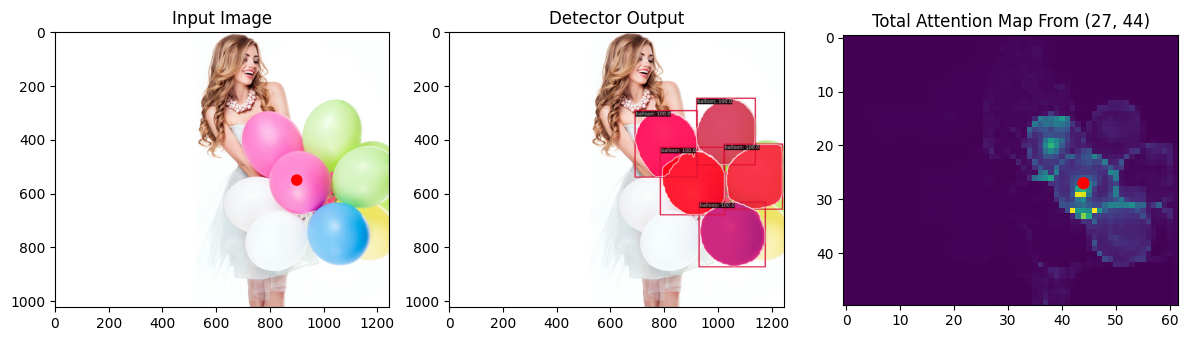

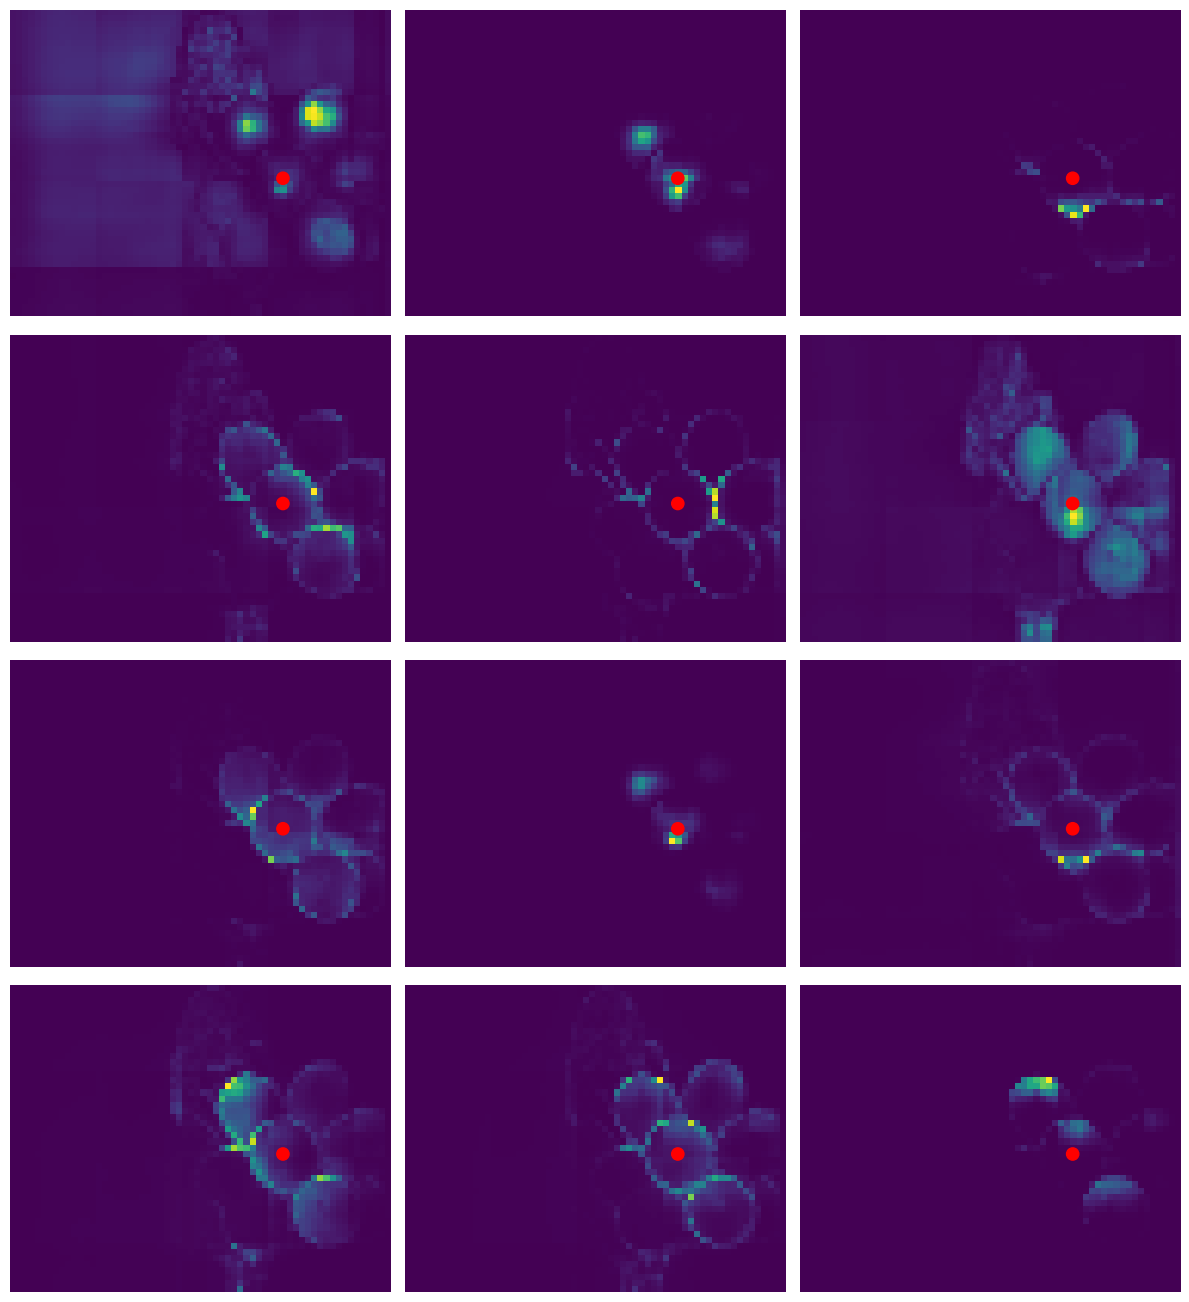

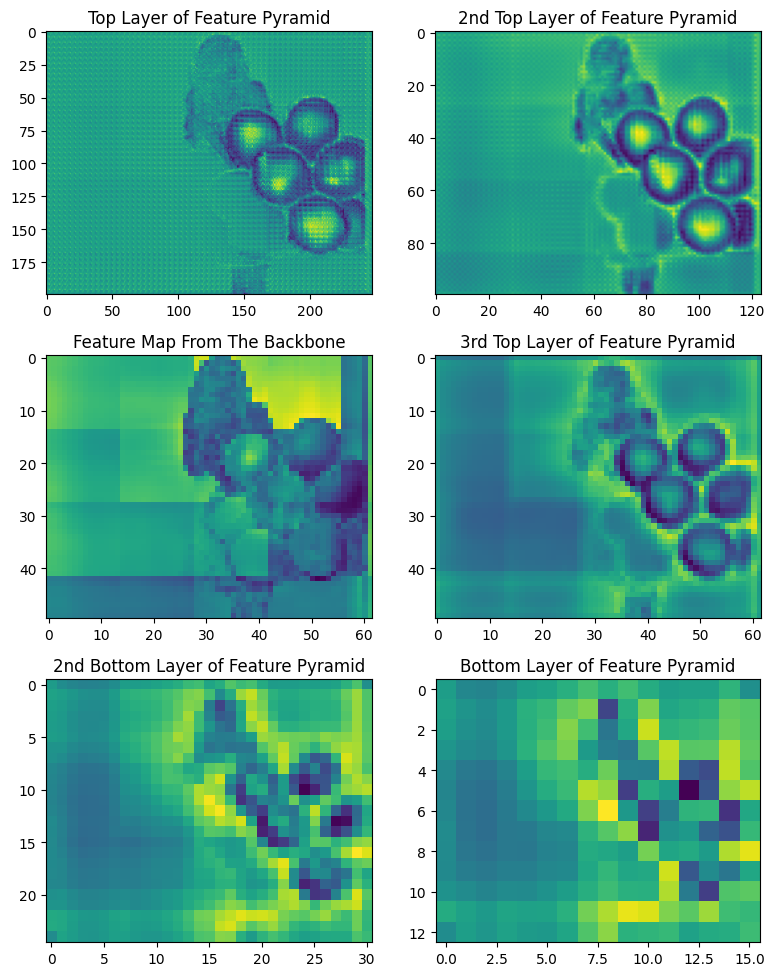

In [7]:
vis_vitdet_result(
    "./demo_balloon_0.jpg",
    "rgb",
    "./eval_configs/cascade-mask-rcnn_vitmae_b16_sfpn_600e_balloon.py",
    "./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_600e_balloon_epoch_300.pth",
    "./analysis_out/",
    "cuda",
    550, 900, 4)

Some model parameters or buffers are not found in the checkpoint:
blocks.0.attn.{rel_pos_h, rel_pos_w}
blocks.1.attn.{rel_pos_h, rel_pos_w}
blocks.10.attn.{rel_pos_h, rel_pos_w}
blocks.11.attn.{rel_pos_h, rel_pos_w}
blocks.2.attn.{rel_pos_h, rel_pos_w}
blocks.3.attn.{rel_pos_h, rel_pos_w}
blocks.4.attn.{rel_pos_h, rel_pos_w}
blocks.5.attn.{rel_pos_h, rel_pos_w}
blocks.6.attn.{rel_pos_h, rel_pos_w}
blocks.7.attn.{rel_pos_h, rel_pos_w}
blocks.8.attn.{rel_pos_h, rel_pos_w}
blocks.9.attn.{rel_pos_h, rel_pos_w}
The checkpoint state_dict contains keys that are not used by the model:
  cls_token
  norm.{bias, weight}


Loads checkpoint by local backend from path: ./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_1x_coco_epoch_11.pth


/home/ryan/miniconda3/envs/openmmlab/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)
/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)
/home/ryan/miniconda3/envs/

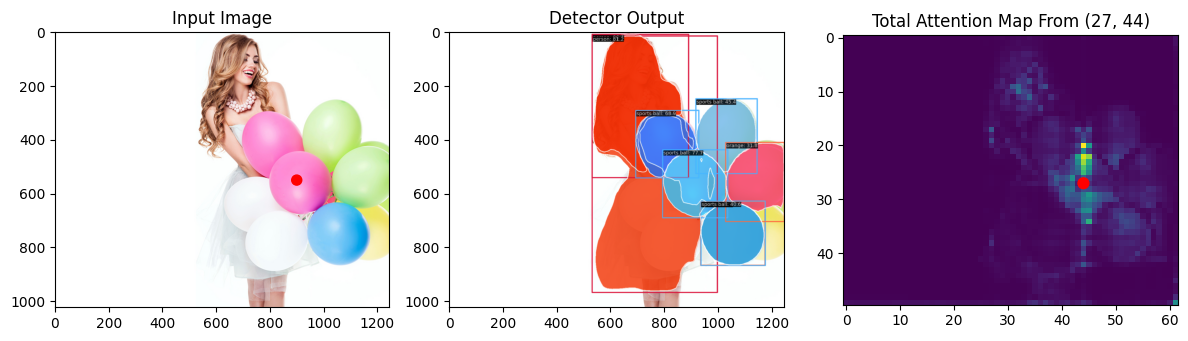

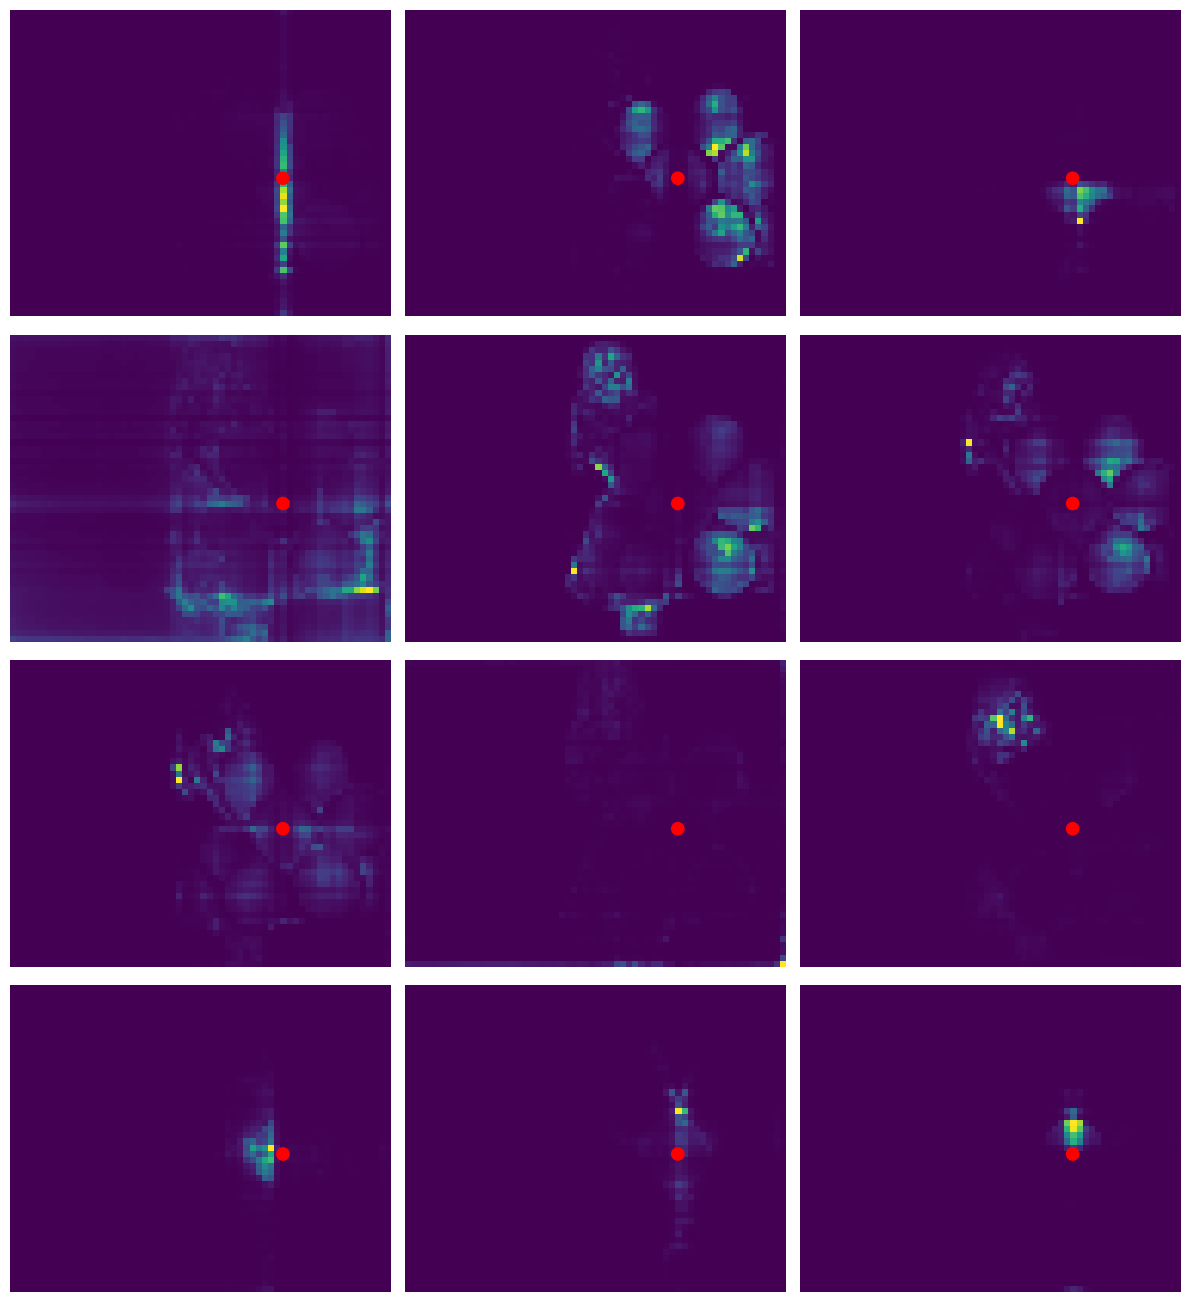

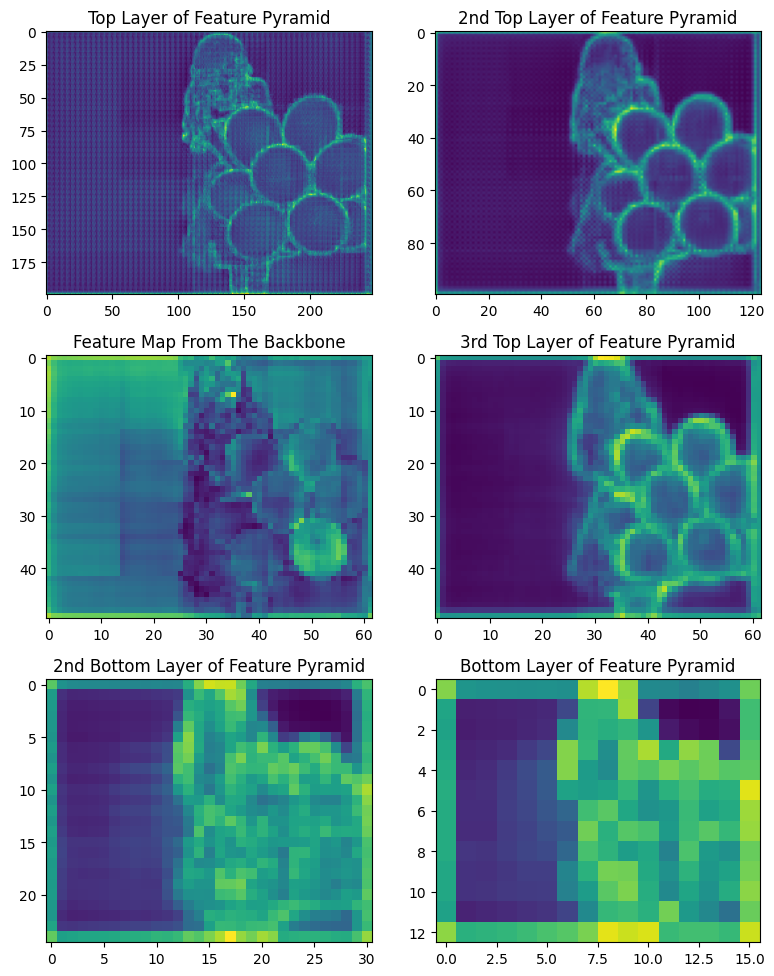

In [8]:
vis_vitdet_result(
    "./demo_balloon_0.jpg",
    "rgb",
    "./eval_configs/cascade-mask-rcnn_vitmae_b16_sfpn_1x_coco.py",
    "./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_1x_coco_epoch_11.pth",
    "./analysis_out/",
    "cuda",
    550, 900, 4)

Some model parameters or buffers are not found in the checkpoint:
blocks.0.attn.{rel_pos_h, rel_pos_w}
blocks.1.attn.{rel_pos_h, rel_pos_w}
blocks.10.attn.{rel_pos_h, rel_pos_w}
blocks.11.attn.{rel_pos_h, rel_pos_w}
blocks.2.attn.{rel_pos_h, rel_pos_w}
blocks.3.attn.{rel_pos_h, rel_pos_w}
blocks.4.attn.{rel_pos_h, rel_pos_w}
blocks.5.attn.{rel_pos_h, rel_pos_w}
blocks.6.attn.{rel_pos_h, rel_pos_w}
blocks.7.attn.{rel_pos_h, rel_pos_w}
blocks.8.attn.{rel_pos_h, rel_pos_w}
blocks.9.attn.{rel_pos_h, rel_pos_w}
The checkpoint state_dict contains keys that are not used by the model:
  cls_token
  norm.{bias, weight}


Loads checkpoint by local backend from path: ./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_1x_coco_epoch_11.pth


/home/ryan/miniconda3/envs/openmmlab/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)
/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


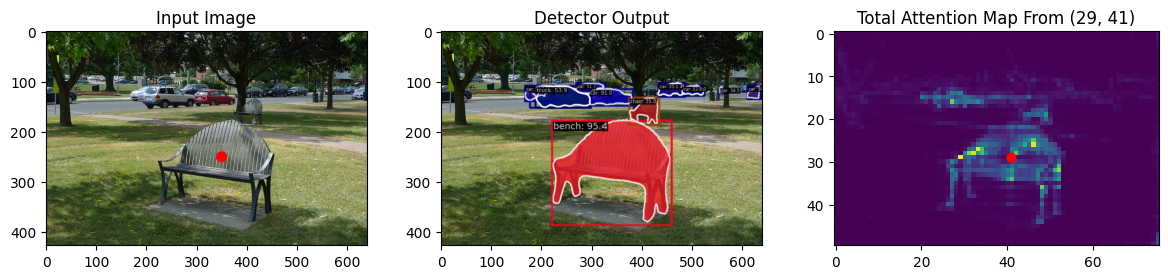

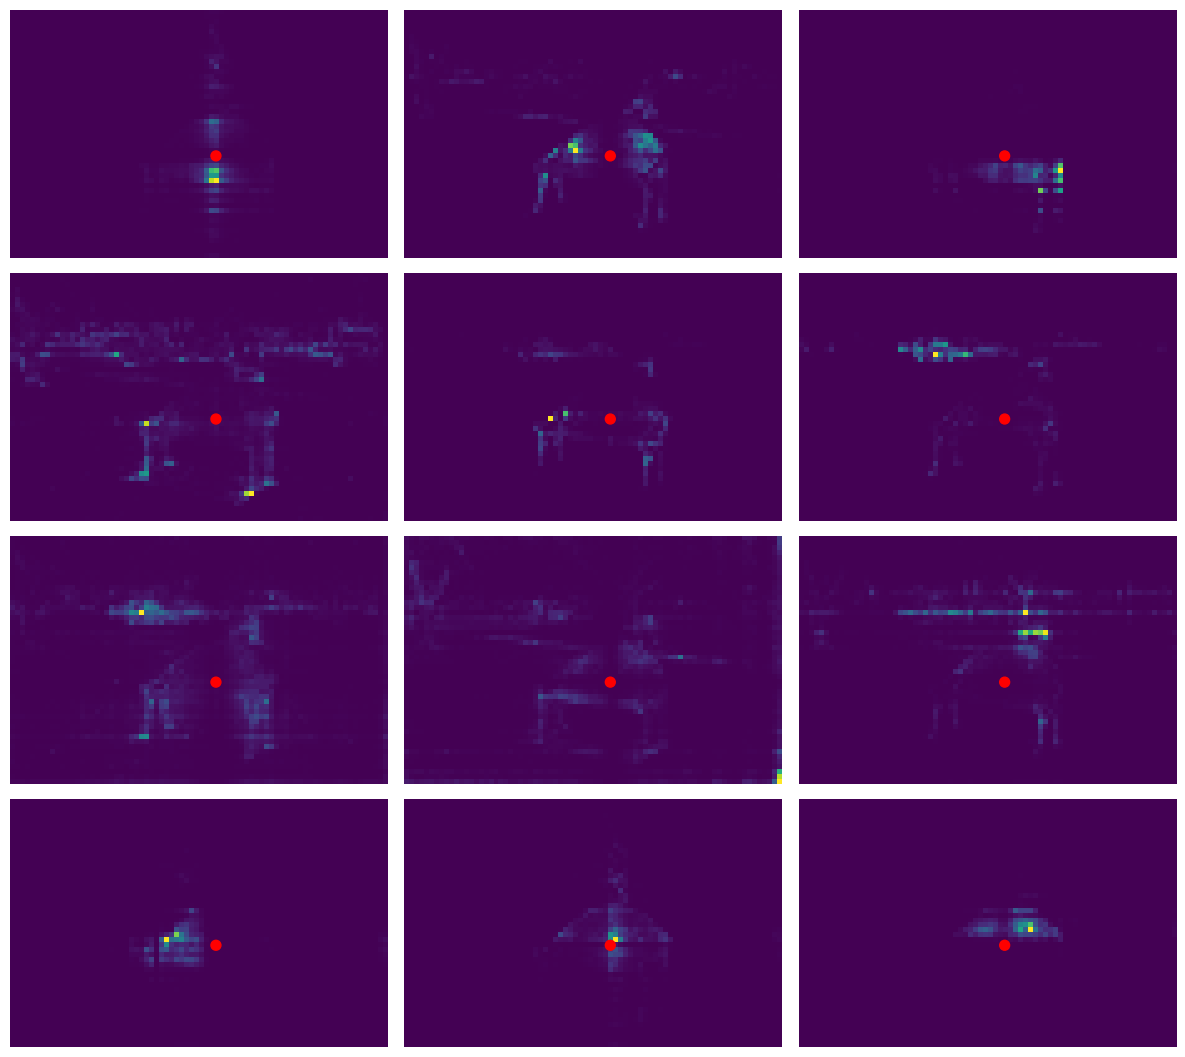

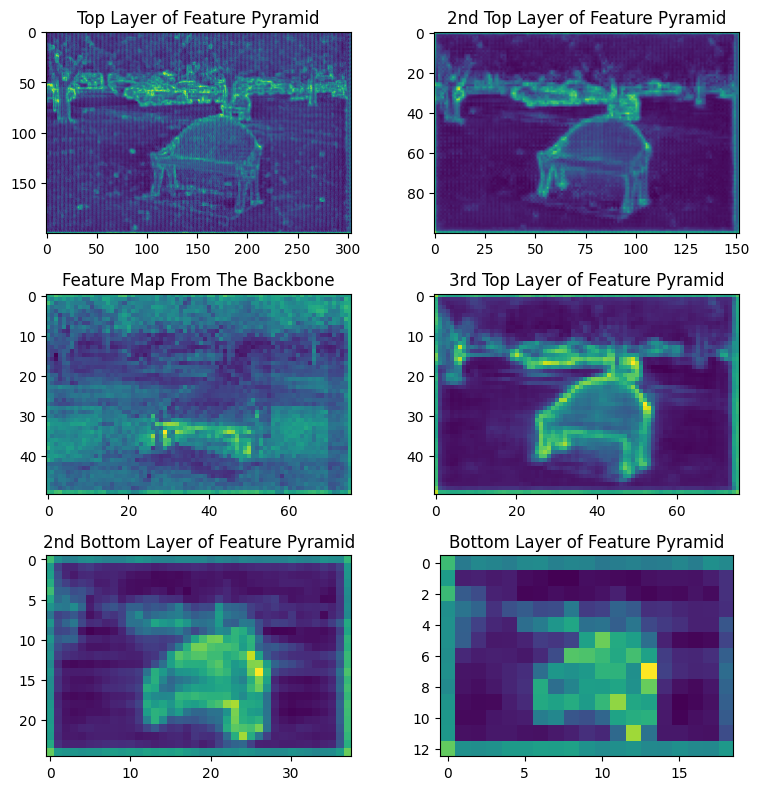

In [9]:
vis_vitdet_result(
    "../../demo/demo.jpg",
    "rgb",
    "./eval_configs/cascade-mask-rcnn_vitmae_b16_sfpn_1x_coco.py",
    "./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_1x_coco_epoch_11.pth",
    "./analysis_out/",
    "cuda",
    250, 350, 4)

Some model parameters or buffers are not found in the checkpoint:
blocks.0.attn.{rel_pos_h, rel_pos_w}
blocks.1.attn.{rel_pos_h, rel_pos_w}
blocks.2.attn.{rel_pos_h, rel_pos_w}
blocks.3.attn.{rel_pos_h, rel_pos_w}
blocks.4.attn.{rel_pos_h, rel_pos_w}
blocks.5.attn.{rel_pos_h, rel_pos_w}
The checkpoint state_dict contains keys that are not used by the model:
  cls_token
  norm.{bias, weight}
  blocks.10.attn.proj.{bias, weight}
  blocks.10.attn.qkv.{bias, weight}
  blocks.10.mlp.fc1.{bias, weight}
  blocks.10.mlp.fc2.{bias, weight}
  blocks.10.norm1.{bias, weight}
  blocks.10.norm2.{bias, weight}
  blocks.11.attn.proj.{bias, weight}
  blocks.11.attn.qkv.{bias, weight}
  blocks.11.mlp.fc1.{bias, weight}
  blocks.11.mlp.fc2.{bias, weight}
  blocks.11.norm1.{bias, weight}
  blocks.11.norm2.{bias, weight}
  blocks.6.attn.proj.{bias, weight}
  blocks.6.attn.qkv.{bias, weight}
  blocks.6.mlp.fc1.{bias, weight}
  blocks.6.mlp.fc2.{bias, weight}
  blocks.6.norm1.{bias, weight}
  blocks.6.norm2.

Loads checkpoint by local backend from path: ./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_6_768_1x_coco_epoch_12.pth


/home/ryan/miniconda3/envs/openmmlab/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)
/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


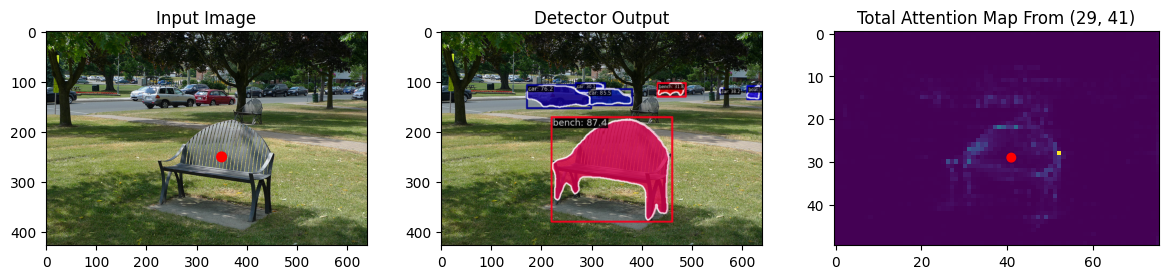

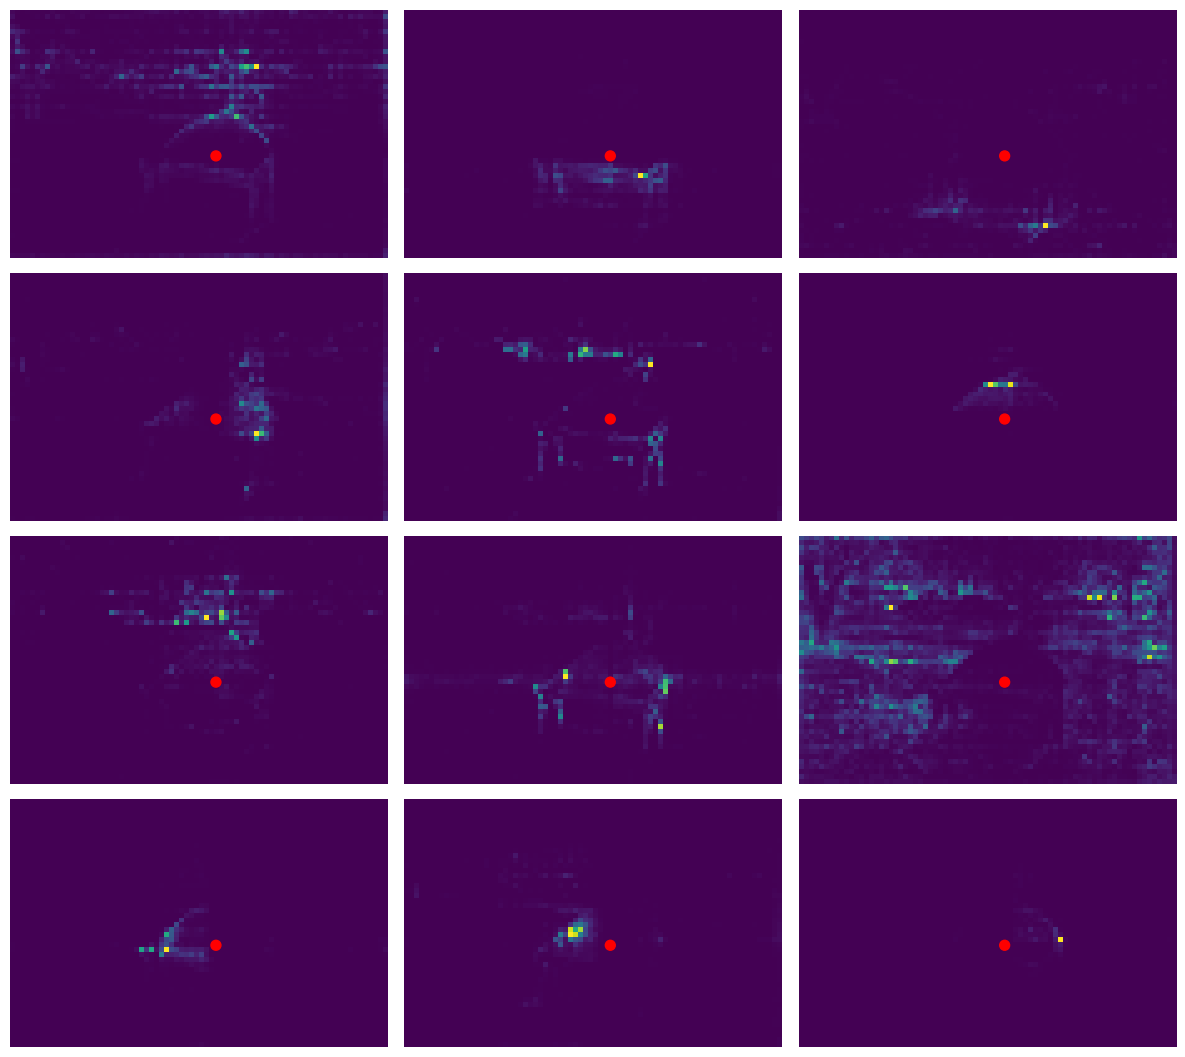

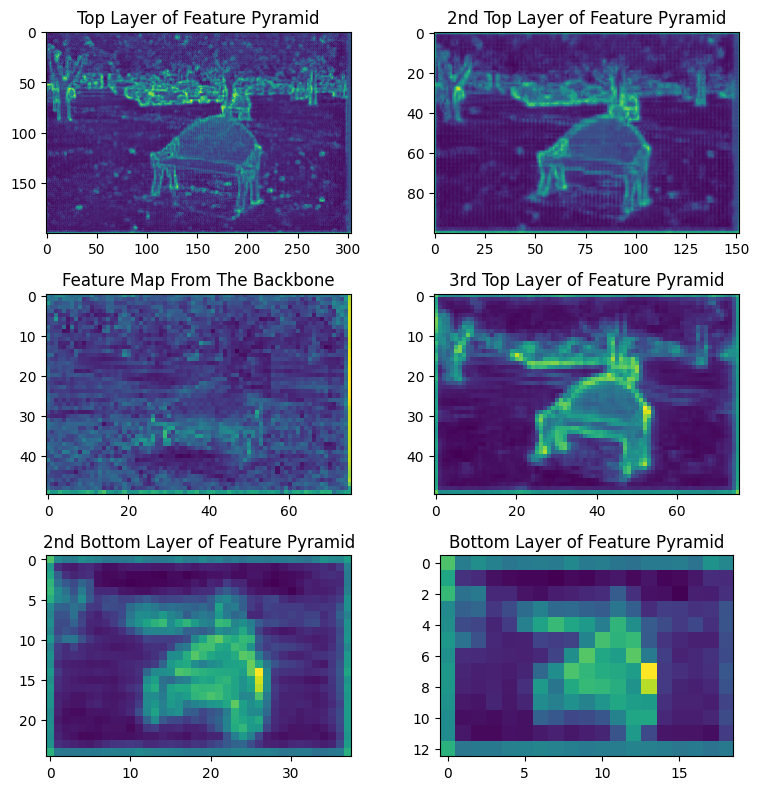

In [10]:
vis_vitdet_result(
    "../../demo/demo.jpg",
    "rgb",
    "./eval_configs/cascade-mask-rcnn_vitmae_b16_sfpn_6_768_1x_coco.py",
    "./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_6_768_1x_coco_epoch_12.pth",
    "./analysis_out/",
    "cuda",
    250, 350, 4)

Shape of blocks.0.attn.proj.bias in checkpoint is torch.Size([768]), while shape of blocks.0.attn.proj.bias in model is torch.Size([384]).
blocks.0.attn.proj.bias will not be loaded. Please double check and see if this is desired.
Shape of blocks.0.attn.proj.weight in checkpoint is torch.Size([768, 768]), while shape of blocks.0.attn.proj.weight in model is torch.Size([384, 384]).
blocks.0.attn.proj.weight will not be loaded. Please double check and see if this is desired.
Shape of blocks.0.attn.qkv.bias in checkpoint is torch.Size([2304]), while shape of blocks.0.attn.qkv.bias in model is torch.Size([1152]).
blocks.0.attn.qkv.bias will not be loaded. Please double check and see if this is desired.
Shape of blocks.0.attn.qkv.weight in checkpoint is torch.Size([2304, 768]), while shape of blocks.0.attn.qkv.weight in model is torch.Size([1152, 384]).
blocks.0.attn.qkv.weight will not be loaded. Please double check and see if this is desired.
Shape of blocks.0.mlp.fc1.bias in checkpoint i

Loads checkpoint by local backend from path: ./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_6_384_1x_coco_epoch_12.pth


/home/ryan/miniconda3/envs/openmmlab/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)
/home/ryan/Developer/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


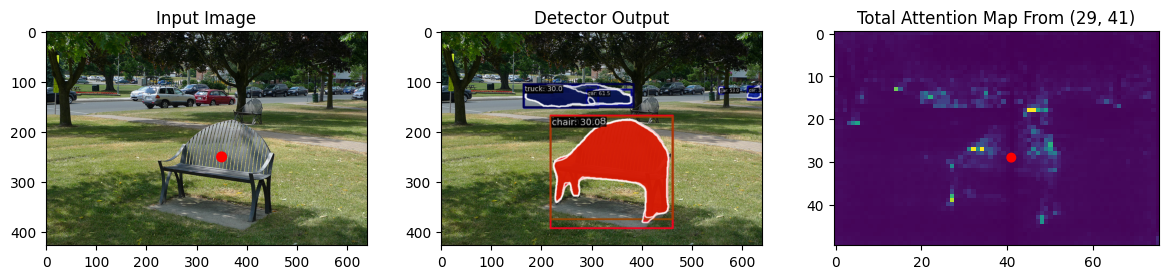

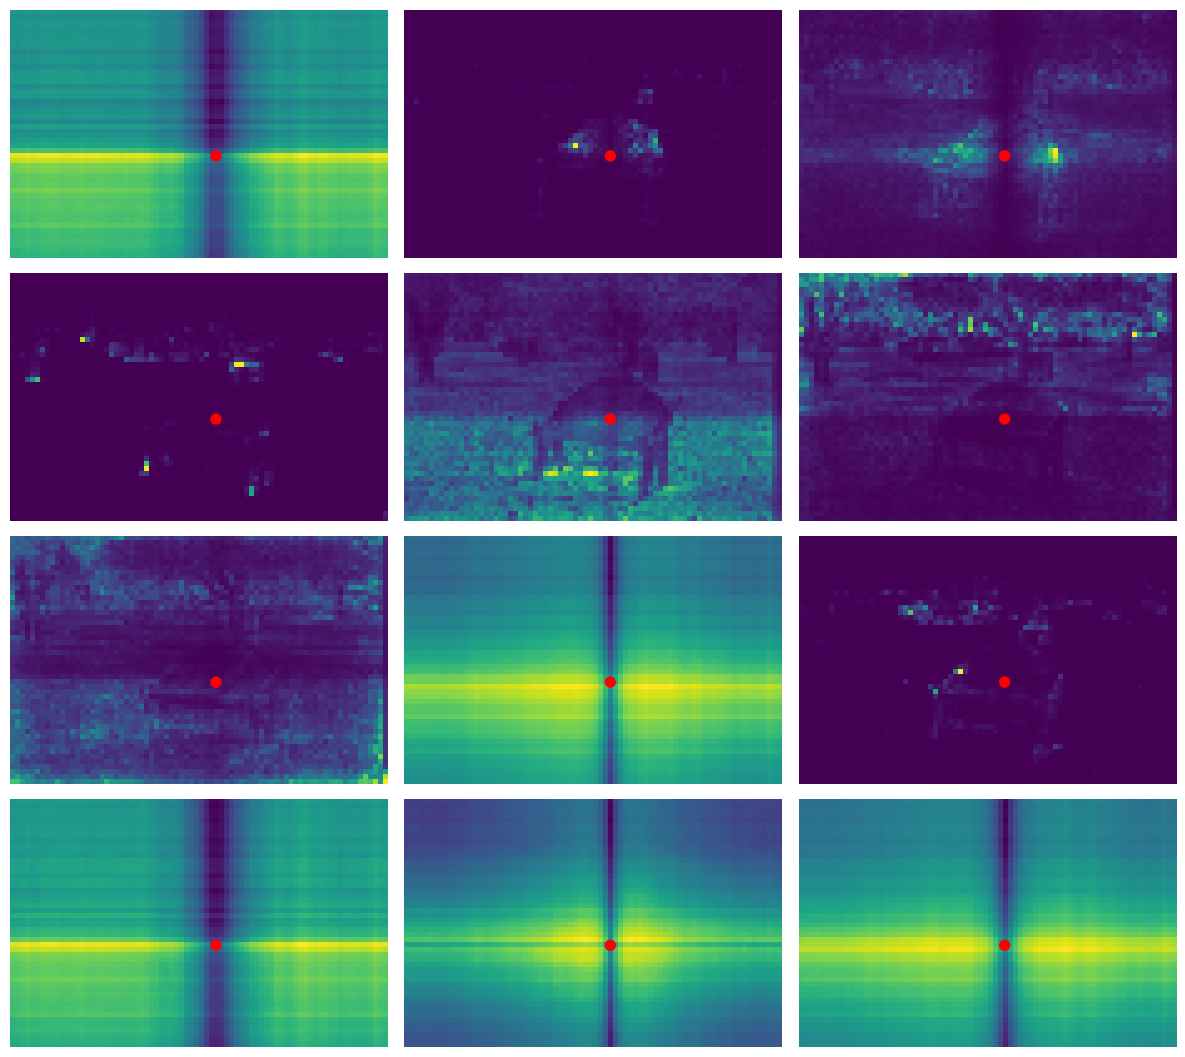

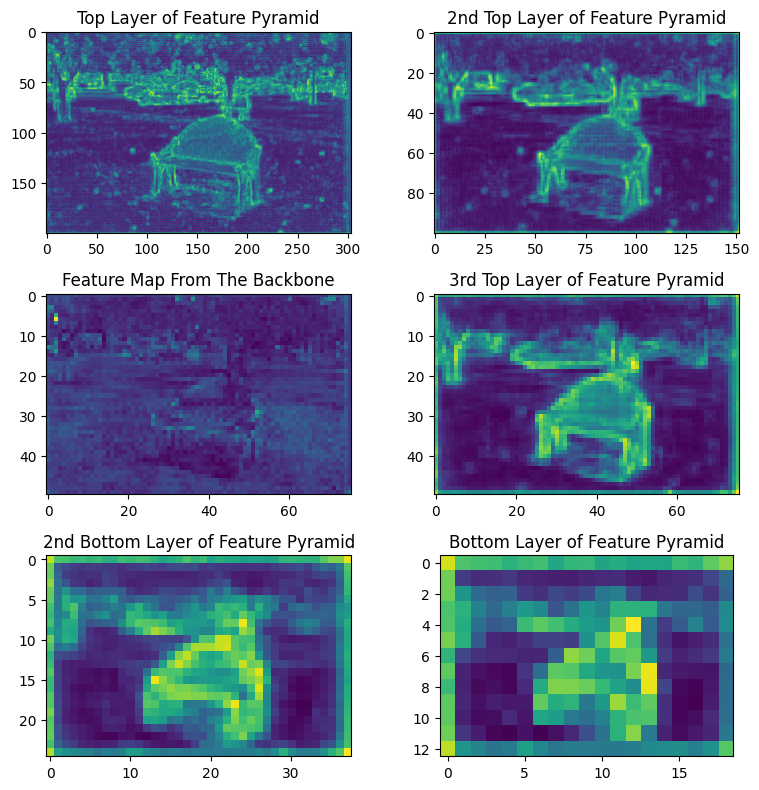

In [11]:
vis_vitdet_result(
    "../../demo/demo.jpg",
    "rgb",
    "./eval_configs/cascade-mask-rcnn_vitmae_b16_sfpn_6_384_1x_coco.py",
    "./checkpoints/cascade-mask-rcnn_vitmae_b16_sfpn_6_384_1x_coco_epoch_12.pth",
    "./analysis_out/",
    "cuda",
    250, 350, 4)